# Testing Micrograd

In [14]:
import random
from typing import cast

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons

from model import loss_mean_square_error, MultiLayerPerceptron, Value

%matplotlib inline

In [15]:
np.random.seed(1337)
random.seed(1337)

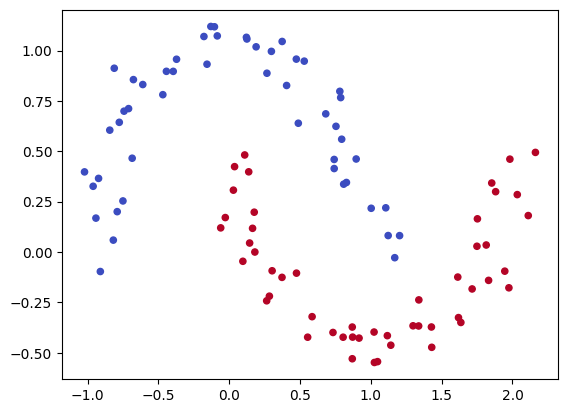

In [16]:
X, y = make_moons(n_samples=100, noise=0.1)
y = np.where(y == 0, -1, 1)
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap=plt.get_cmap('coolwarm'))

In [ ]:
# 2 inputs, two hidden layers with 16 outputs and one with 20 outputs, output is
# 1 value
model = MultiLayerPerceptron(2, [16, 16, 20, 1])
print(f'Number of parameters: {len(model.parameters())}')

Number of parameters: 681


In [18]:
for k in range(100):
    total_loss, acc = loss_mean_square_error(model, X, y)

    for p in model.parameters():
        p.grad = 0

    total_loss.backward()

    # learning_rate = 1.0 - 0.9 * k / 100
    learning_rate = 0.0001

    for p in model.parameters():
        p.data -= learning_rate * p.grad

    print(f'Step {k}, loss: {total_loss.data}, accuracy: {acc*100}%')

Step 0, loss: 194.7401551090416, accuracy: 50.0%
Step 1, loss: 194.33390989663565, accuracy: 50.0%
Step 2, loss: 193.86365342748178, accuracy: 50.0%
Step 3, loss: 193.31396662421503, accuracy: 50.0%
Step 4, loss: 192.66439388535852, accuracy: 50.0%
Step 5, loss: 191.88736928429975, accuracy: 50.0%
Step 6, loss: 190.94513036653282, accuracy: 50.0%
Step 7, loss: 189.78507714757725, accuracy: 50.0%
Step 8, loss: 188.33276504885953, accuracy: 50.0%
Step 9, loss: 186.48142193969218, accuracy: 50.0%
Step 10, loss: 184.07683454858625, accuracy: 50.0%
Step 11, loss: 180.8976939810449, accuracy: 50.0%
Step 12, loss: 176.63701536585677, accuracy: 50.0%
Step 13, loss: 170.9062459562491, accuracy: 50.0%
Step 14, loss: 163.3127839380569, accuracy: 50.0%
Step 15, loss: 153.66152106066704, accuracy: 50.0%
Step 16, loss: 142.16555814792036, accuracy: 53.0%
Step 17, loss: 129.2938694100933, accuracy: 59.0%
Step 18, loss: 115.31657448040589, accuracy: 63.0%
Step 19, loss: 100.51410009638369, accuracy: 6

(-1.548639298268643, 1.951360701731357)

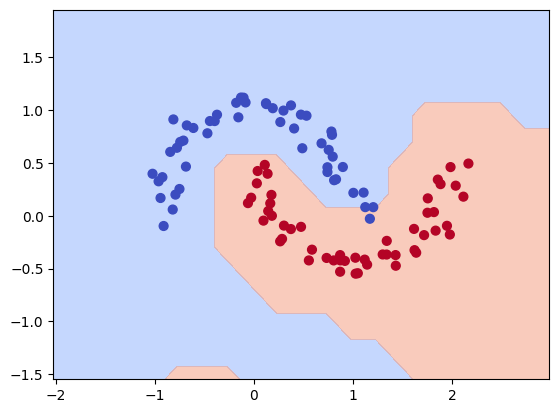

In [19]:
h = 0.25
x_min = X[:,0].min() - 1
x_max = X[:,0].max() + 1
y_min = X[:,1].min() - 1
y_max = X[:,1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))

Z = np.array([cast(Value, s).data > 0 for s in scores])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.get_cmap('coolwarm'), alpha=0.5)
plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.get_cmap('coolwarm'))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())